This is a first visualization test!

In [139]:
import glob
import pandas as pd

In [140]:
result_files = glob.glob('data/' + 'results*.json')

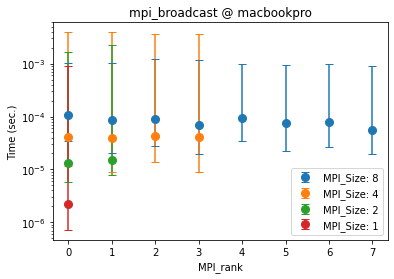

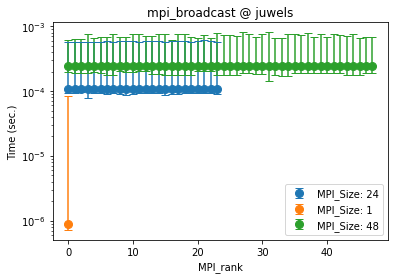

In [141]:
for file in result_files:
    sysname = file.split('_')[-1].split('.')[0]

    df = pd.read_json(file)

    # for name in df['name'].unique():
    #     print(name, df[df['name'].eq(name)]['MPI_size'].unique())

    df = df[df['name'].isin(['mpi_broadcast']) & df['params_n'].isin([10000])]

    sizes = df['MPI_size'].unique()

    ax = None
    for i, size in enumerate(sizes):
        df_extract = df[df['MPI_size'].eq(size)]
        ax = df_extract.plot(ax=ax, logy=True, title=f'mpi_broadcast @ {sysname}', label=f'MPI_Size: {size}', ylabel='Time (sec.)', legend=True, x='MPI_rank', y='mean_duration', yerr=[df_extract['mean_duration']- df_extract['min_duration'], df_extract['max_duration'] - df_extract['mean_duration']], capsize=4, fmt='o', markersize=8)